In [5]:
import pandas as pd
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')
df_load.head()


,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df_load.shape

(7113, 22)

In [10]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
df_load.drop_duplicates()
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
df_load.dropna(subset=['Churn'],inplace=True)
print('Status Missing Values:',df_load.isnull().values.any())
print('\nJumlah Missing Values masing-masing kolom, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values: True

Jumlah Missing Values masing-masing kolom, adalah:
tenure              99
MonthlyCharges      26
TotalCharges        15
gender               0
UpdatedAt            0
customerID           0
Dependents           0
Partner              0
SeniorCitizen        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
MultipleLines        0
InternetService      0
TechSupport          0
DeviceProtection     0
StreamingTV          0
StreamingMovies      0
PaperlessBilling     0
Contract             0
PaymentMethod        0
Churn                0
dtype: int64


In [11]:
# Handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)


C:\Users\ACER\AppData\Local\Temp\ipykernel_12804\2696466082.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)


In [12]:
# Loop 
# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


C:\Users\ACER\AppData\Local\Temp\ipykernel_12804\882060686.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load[col_name].fillna(median, inplace=True)
C:\Users\ACER\AppData\Local\Temp\ipykernel_12804\882060686.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

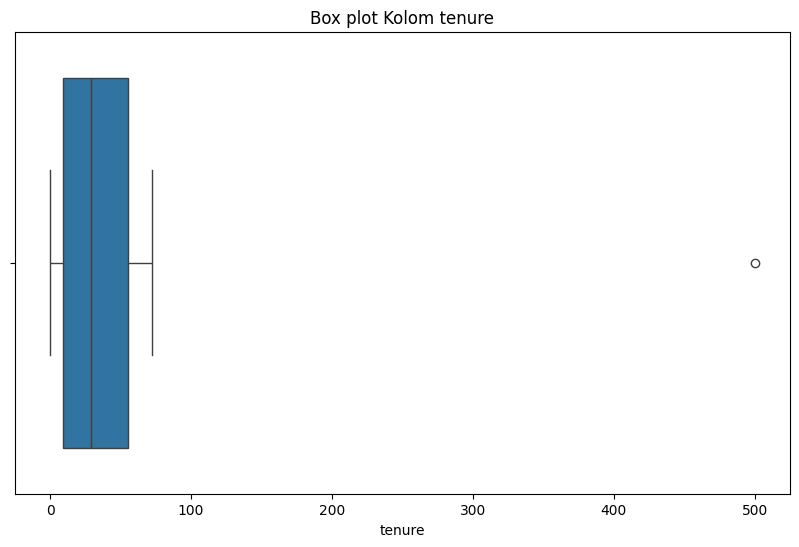

In [14]:
# Creating box plot
import matplotlib.pyplot as plt
import seaborn as sns

# Misal untuk kolom tenure
plt.figure(figsize=(10,6))
sns.boxplot(x=df_load['tenure'])
plt.title('Box plot Kolom tenure')
plt.show()

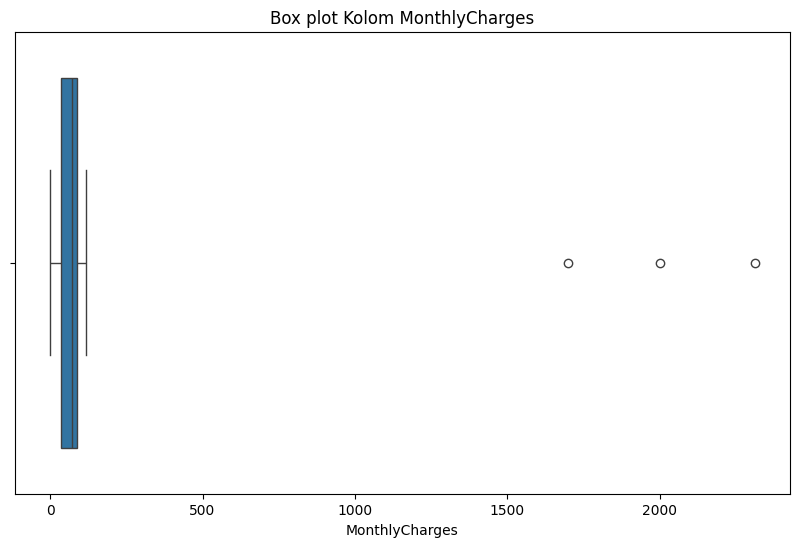

In [15]:
# Membuat box plot untuk kolom 'MonthlyCharges'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_load['MonthlyCharges'])
plt.title('Box plot Kolom MonthlyCharges')
plt.show()

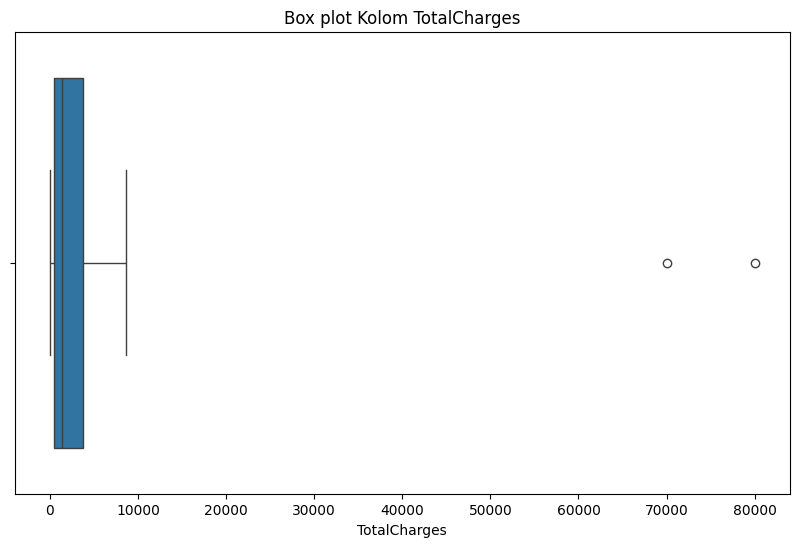

In [16]:
# Membuat box plot untuk kolom 'TotalCharges'
plt.figure(figsize=(10,6))
sns.boxplot(x=df_load['TotalCharges'])
plt.title('Box plot Kolom TotalCharges')
plt.show()

In [18]:
# Handling Outliers with IQR
# Hitung Q1 dan Q3 untuk kolom yang relevan
Q1 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure', 'MonthlyCharges', 'TotalCharges']].quantile(0.75)

# Hitung IQR
IQR = Q3 - Q1

# Hitung batas atas dan bawah
maximum = Q3 + (1.5 * IQR)
minimum = Q1 - (1.5 * IQR)

print('Nilai Maximum dari masing-masing Variable adalah:')
print(maximum)
print('\nNilai Minimum dari masing-masing Variable adalah:')
print(minimum)

# Filter hanya kolom yang relevan untuk operasi perbandingan
relevant_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Masking outliers
df_load[relevant_columns] = df_load[relevant_columns].mask(
    df_load[relevant_columns] > maximum, maximum, axis=1
)
df_load[relevant_columns] = df_load[relevant_columns].mask(
    df_load[relevant_columns] < minimum, minimum, axis=1
)

print('\nPersebaran data setelah ditangani Outlier: ')
print(df_load[relevant_columns].describe())

Nilai Maximum dari masing-masing Variable adalah:
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

Nilai Minimum dari masing-masing Variable adalah:
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

Persebaran data setelah ditangani Outlier: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


In [19]:
# Loop
for col_name in list(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: coun

In [20]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female', 'Male', 'Yes', 'Yes'])
# Loop
for col_name in list(['gender', 'Dependents', 'Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0m Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized  Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized  Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized  Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64
